In [172]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [203]:
# experiments2compare = ["sgd_lr5e-2", "edm_lr5e-2", "edm_lr1e-2", "sgd_lr1e-2"]
# experiments2compare = ["sgd_test", "edm_test"]
experiments2compare = ["edm_norm_lr5e-2", "edm_norm_lr1e-1", "sgd", "edm_lr5e-2"]

In [204]:
data = {}
for exp in experiments2compare:
    data[exp] = np.load("./{}/convergence.npz".format(exp), allow_pickle=True)

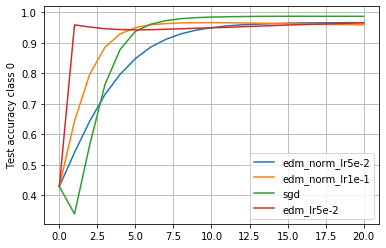

In [205]:
for exp in data:
    plt.plot(data[exp]["test_accuracy_per_class"].item()[0], label=exp)

plt.legend()
plt.ylabel("Test accuracy class 0")
plt.grid(True)

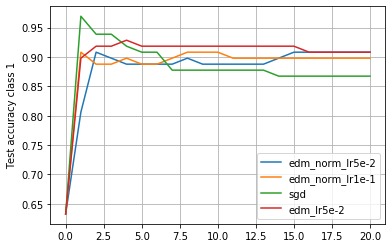

In [206]:
for exp in data:
    plt.plot(data[exp]["test_accuracy_per_class"].item()[1], label=exp)

plt.legend()
plt.ylabel("Test accuracy class 1")
plt.grid(True)

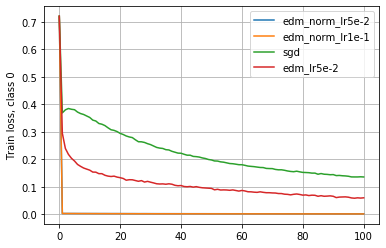

In [207]:
for exp in data:
    plt.plot(data[exp]["train_loss0"], label=exp)

plt.legend()
plt.ylabel("Train loss, class 0")
plt.grid(True)

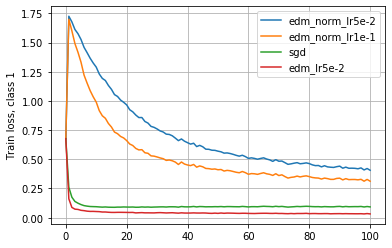

In [208]:
for exp in data:
    plt.plot(data[exp]["train_loss1"], label=exp)

plt.legend()
plt.ylabel("Train loss, class 1")
plt.grid(True)

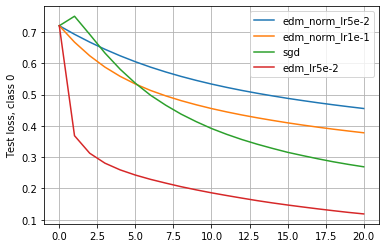

In [209]:
for exp in data:
    plt.plot(data[exp]["test_loss_per_class"].item()[0], label=exp)
plt.legend()
plt.ylabel("Test loss, class 0")
plt.grid(True)

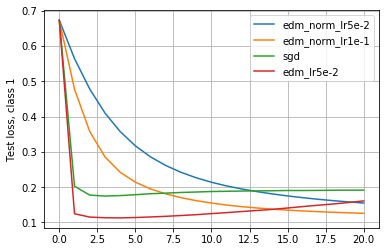

In [210]:
for exp in data:
    plt.plot(data[exp]["test_loss_per_class"].item()[1], label=exp)
plt.legend()
plt.ylabel("Test loss, class 1")
plt.grid(True)

In [152]:
import torch
import models
import sklearn.metrics as sklmet

## Precision, recall, auc

In [153]:
data = np.load("./data.npz")
X_train = data["train_features"]
y_train = data["train_labels"]
X_test = data["test_features"]
y_test = data["test_labels"]

model = models.SimpleNet(X_train.shape[-1])

In [154]:
def evaluate_metric(path2model, X, y, m):
    model.load_state_dict(torch.load(path2model))
    with torch.no_grad():
        output = model(torch.from_numpy(X).float())
        _, pred_labels = torch.max(output, 1)
    pred_labels = pred_labels.numpy()
    if m != "AUC":
        met_val = metrics[m](y, pred_labels)
    else:
        met_val = metrics[m](y, output[:, 1].numpy())
    return met_val

In [155]:
metrics = {"Precision": sklmet.precision_score,
           "Recall": sklmet.recall_score,
           "AUC": sklmet.roc_auc_score}
train_metrics = {}
test_metrics = {}
for m in metrics:
    train_metrics[m] = {}
    test_metrics[m] = {}
    for exp in experiments2compare:
        train_metrics[m][exp] = []
        test_metrics[m][exp] = []

### SGD

In [156]:
for m in metrics:
    for exp in experiments2compare:
        train_metrics[m][exp].append(evaluate_metric("./{}/model_params_init".format(exp), X_train, y_train, m))
        test_metrics[m][exp].append(evaluate_metric("./{}/model_params_init".format(exp), X_test, y_test, m))

In [157]:
for epoch in range(20):
    for m in metrics:
        for exp in experiments2compare:
            train_metrics[m][exp].append(evaluate_metric("./{}/model_params_{}".format(exp, epoch), X_train, y_train, m))
            test_metrics[m][exp].append(evaluate_metric("./{}/model_params_{}".format(exp, epoch), X_test, y_test, m))

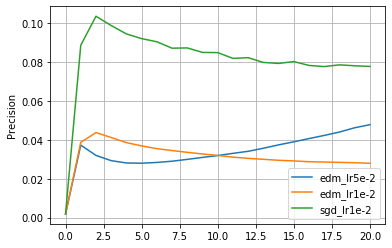

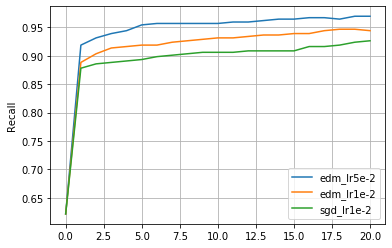

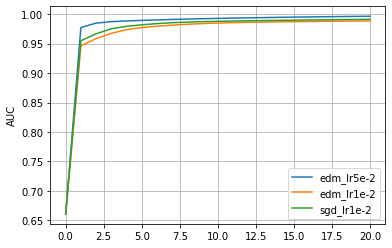

In [158]:
for m in metrics:
    plt.figure()
    for exp in experiments2compare:
        plt.plot(train_metrics[m][exp], label=exp)
    plt.ylabel(m)
    plt.legend()
    plt.grid(True)

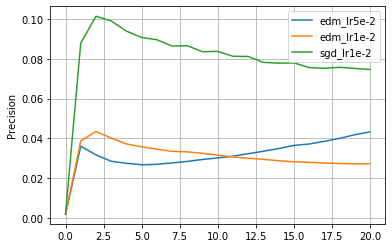

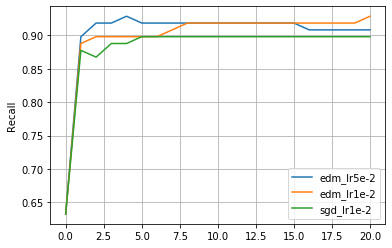

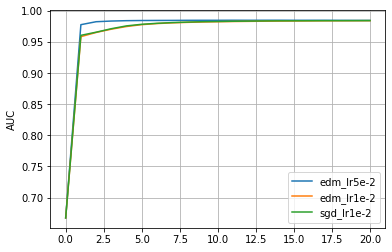

In [159]:
for m in metrics:
    plt.figure()
    for exp in experiments2compare:
        plt.plot(test_metrics[m][exp], label=exp)
    plt.ylabel(m)
    plt.legend()
    plt.grid(True)

## Simple test with sklearn

In [71]:
import sklearn.linear_model as skllin

log_reg = skllin.LogisticRegression(class_weight="balanced")
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
y_test_pred = log_reg.predict(X_test)

In [73]:
print(sklmet.precision_score(y_test, y_test_pred))

0.05825242718446602


In [ ]:
sklmet.accuracy_score()